# Modeling with decision trees

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the data
data=pd.read_csv('Data/DirectMarketing_Cln_Classification.csv')

In [3]:
#shape of the data
data.shape

(1000, 15)

In [4]:
#first five rows of the data
data.head()

,Salary,Children,Catalogs,Middle,Old,Young,Female,Male,Own,Rent,Married,Single,Close,Far,Amt_Spnt_Class
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,Low
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,Med
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,Low
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,High
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,Med


In [5]:
print(data.columns)

Index(['Salary', 'Children', 'Catalogs', 'Middle', 'Old', 'Young', 'Female',
       'Male', 'Own', 'Rent', 'Married', 'Single', 'Close', 'Far',
       'Amt_Spnt_Class'],
      dtype='object')


In [6]:
#checking missing values in the data
data.isnull().sum()

Salary            0
Children          0
Catalogs          0
Middle            0
Old               0
Young             0
Female            0
Male              0
Own               0
Rent              0
Married           0
Single            0
Close             0
Far               0
Amt_Spnt_Class    0
dtype: int64

In [7]:
#seperating independent and dependent variables
X = data.drop(['Amt_Spnt_Class'], axis=1)
y = data['Amt_Spnt_Class']


In [8]:
print(X)

     Salary  Children  Catalogs  Middle  Old  Young  Female  Male  Own  Rent  \
0     47500         0         6       0    1      0       1     0    1     0   
1     63600         0         6       1    0      0       0     1    0     1   
2     13500         0        18       0    0      1       1     0    0     1   
3     85600         1        18       1    0      0       0     1    1     0   
4     68400         0        12       1    0      0       1     0    1     0   
..      ...       ...       ...     ...  ...    ...     ...   ...  ...   ...   
995   19400         1        18       0    0      1       1     0    0     1   
996   40500         1        18       1    0      0       0     1    0     1   
997   44800         0        24       0    1      0       0     1    1     0   
998   79000         2        18       1    0      0       0     1    1     0   
999   53600         1        24       0    0      1       0     1    0     1   

     Married  Single  Close  Far  
0   

In [9]:
print(y)

0       Low
1       Med
2       Low
3      High
4       Med
       ... 
995     Low
996     Med
997     Med
998     Low
999     Med
Name: Amt_Spnt_Class, Length: 1000, dtype: object


In [10]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [11]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1, stratify=y, test_size=0.20)

In [12]:
# distribution in training set
y_train.value_counts(normalize=True)

Low     0.50125
High    0.25000
Med     0.24875
Name: Amt_Spnt_Class, dtype: float64

In [13]:
# distribution in validation set
y_valid.value_counts(normalize=True)

Low     0.50
High    0.25
Med     0.25
Name: Amt_Spnt_Class, dtype: float64

In [14]:
#shape of training set
X_train.shape, y_train.shape

((800, 14), (800,))

In [15]:
#shape of validation set
X_valid.shape, y_valid.shape

((200, 14), (200,))

In [16]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [17]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [18]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [19]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [20]:
#checking the training score
dt_model.score(X_train, y_train)

0.9975

In [21]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.75

In [22]:
#predictions on validation set
y_pred = dt_model.predict(X_valid)

In [23]:
dt_model.predict_proba(X_valid)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [24]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [25]:
y_pred

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.])

## Changing the max_depth

#### Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [26]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [27]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,0.63000,0.620
1,2,0.66625,0.675
2,3,0.72625,0.730
3,4,0.76750,0.770
4,5,0.80375,0.805
5,6,0.83375,0.800
6,7,0.87250,0.810
7,8,0.90625,0.805
8,9,0.93750,0.780


#### Training accuracy increases with the depth of the tree.

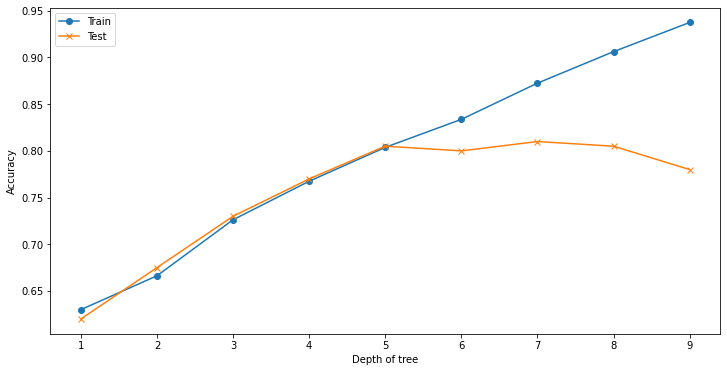

In [28]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='Train')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='x',label='Test')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [29]:
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10)

In [30]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [31]:
#Training score
dt_model.score(X_train, y_train)

0.80125

In [32]:
#Validation score
dt_model.score(X_valid, y_valid)

0.81

In [33]:
y_pred = dt_model.predict(X_valid)

In [34]:
y_valid

17     High
826     Med
512    High
539     Low
238     Low
       ... 
466    High
391     Low
253     Low
259     Low
517     Low
Name: Amt_Spnt_Class, Length: 200, dtype: object

In [35]:
from sklearn import metrics 

conf_matrix_dt = pd.DataFrame(metrics.confusion_matrix(y_valid, y_pred, labels=['High','Med','Low']), index = ['actual high', 'actual med', 'actual low'], 
                               columns = ['predicted high', 'predicted med', 'predicted low'])

conf_matrix_dt

,predicted high,predicted med,predicted low
actual high,44,5,1
actual med,10,32,8
actual low,2,12,86


In [36]:
# accuracy score
metrics.accuracy_score(y_valid, y_pred)

0.81

In [37]:
# recall
metrics.recall_score(y_valid, y_pred, average=None)

array([0.88, 0.86, 0.64])

In [38]:
# precision score
metrics.precision_score(y_valid, y_pred, average=None)

array([0.78571429, 0.90526316, 0.65306122])

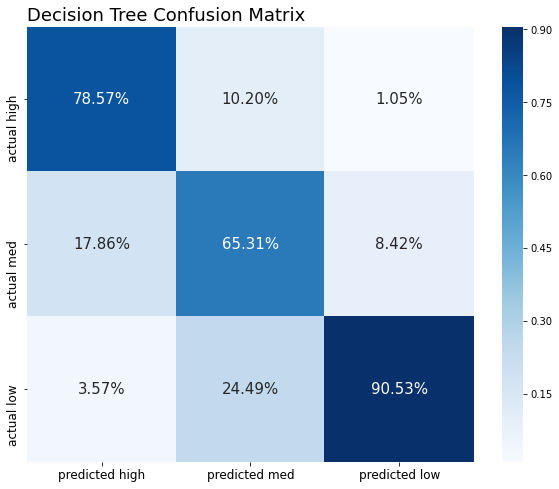

In [39]:
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(conf_matrix_dt/np.sum(conf_matrix_dt), annot=True, 
            fmt='.2%', cmap='Blues', annot_kws={'size':15})

ax.set_title('Decision Tree Confusion Matrix', fontsize = 18, loc='left')

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

plt.show()

In [40]:
from sklearn import tree

In [41]:
!pip install graphviz

In [42]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=20,filled=True)

In [43]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

reference:

https://courses.analyticsvidhya.com/courses/take/getting-started-with-decision-trees/downloads/8157667-dataset-decision-tree-implementation